In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Reference values from our PAC analysis
ref_values = {
    'pac': 2.39,
    'gamma_freq': 43.9,
    'mod_width': 28.7,
    'total_mod': 83.2
}

# Number of subjects
n_subjects = 15

In [4]:
# Create base variable that will drive correlations
base = np.random.normal(0, 1, n_subjects)

# Add individual noise components
noise_pac = np.random.normal(0, 0.3, n_subjects)
noise_freq = np.random.normal(0, 0.2, n_subjects)
noise_width = np.random.normal(0, 0.3, n_subjects)
noise_total = np.random.normal(0, 0.4, n_subjects)

# Generate features with realistic relationships
data = pd.DataFrame({
    'pac': ref_values['pac'] + 0.3 * base + noise_pac,
    'gamma_freq': ref_values['gamma_freq'] - 2 * base + noise_freq,  # negative correlation
    'mod_width': ref_values['mod_width'] - 3 * base + noise_width,   # negative correlation
    'total_mod': ref_values['total_mod'] + 8 * base + noise_total    # positive correlation
})

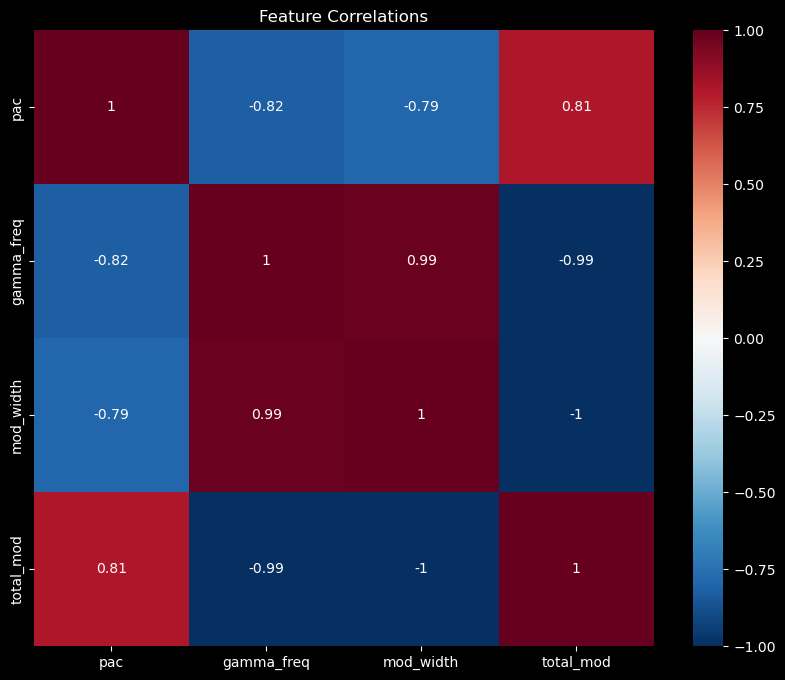

<Figure size 1200x1200 with 0 Axes>

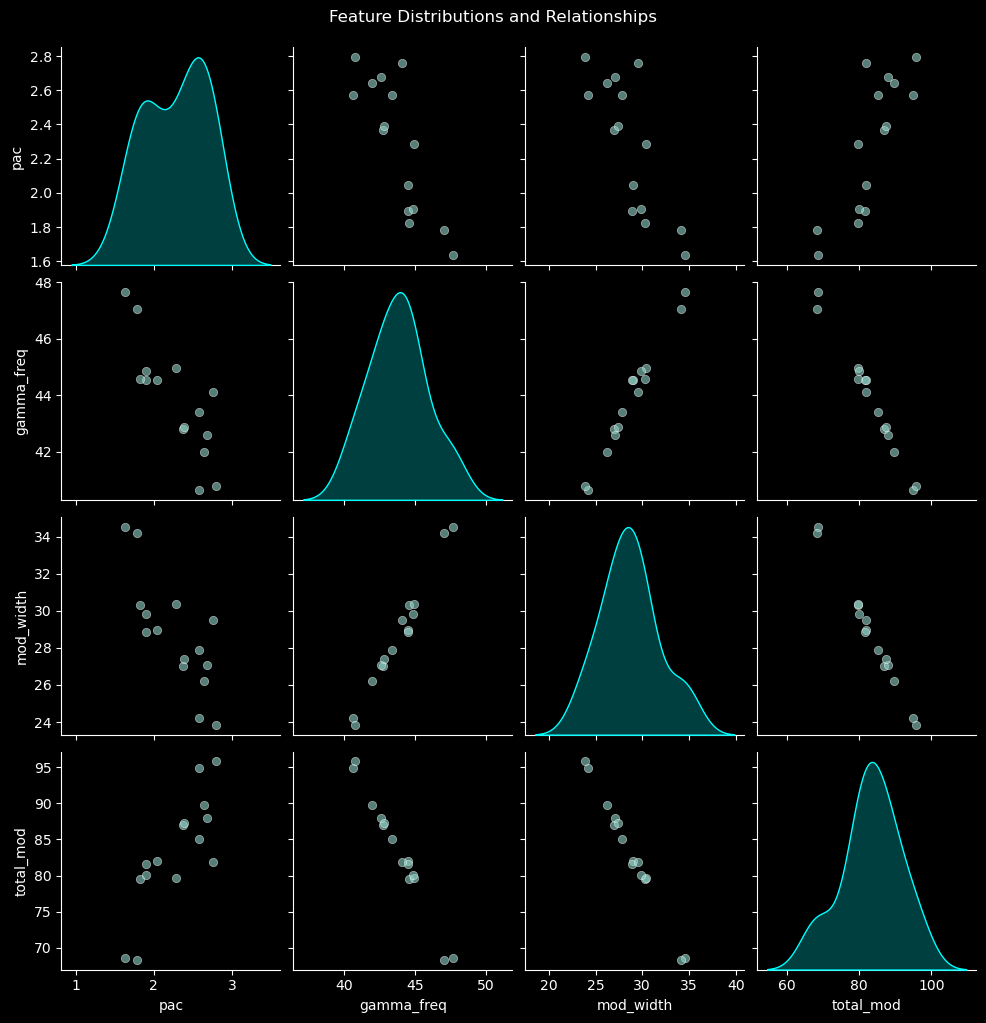


=== Feature Statistics ===

PAC:
Mean: 2.28
Std: 0.40
Range: 1.64 to 2.80

GAMMA_FREQ:
Mean: 43.82
Std: 2.00
Range: 40.64 to 47.67

MOD_WIDTH:
Mean: 28.68
Std: 3.04
Range: 23.85 to 34.54

TOTAL_MOD:
Mean: 83.30
Std: 7.89
Range: 68.35 to 95.80


In [5]:
# Visualize the relationships in the generated data
plt.style.use('dark_background')

# 1. Correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.title('Feature Correlations')
plt.show()

# 2. Pairplot to show distributions and relationships
plt.figure(figsize=(12, 12))
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.6}, 
           diag_kws={'color': 'cyan'})
plt.suptitle('Feature Distributions and Relationships', y=1.02)
plt.show()

# 3. Print basic statistics
print("\n=== Feature Statistics ===")
for col in data.columns:
   print(f"\n{col.upper()}:")
   print(f"Mean: {data[col].mean():.2f}")
   print(f"Std: {data[col].std():.2f}")
   print(f"Range: {data[col].min():.2f} to {data[col].max():.2f}")

GENERATING WORKING MEMROY SCORES

In [1]:
# Generate WM scores (e.g., 0-100 scale)
# Higher PAC, more precise gamma freq (closer to 40Hz), narrower width, and higher total mod -> better WM

# Create base WM score using weighted combination of z-scored features
z_data = (data - data.mean()) / data.std()  # z-score features

wm_base = (
    0.4 * z_data['pac'] +                          # higher PAC -> better WM
    -0.3 * abs(z_data['gamma_freq'] - 40) +        # closer to 40Hz -> better WM
    -0.2 * z_data['mod_width'] +                   # narrower width -> better WM
    0.1 * z_data['total_mod']                      # higher total mod -> better WM
)

# Scale to realistic WM score range (e.g., 70-100) and add noise
wm_scores = 85 + 15 * (wm_base - wm_base.min()) / (wm_base.max() - wm_base.min())
wm_scores += np.random.normal(0, 2, n_subjects)  # Add some noise

# Add to dataframe
data['wm_score'] = wm_scores

# Print correlations with WM
print("=== Correlations with Working Memory ===")
for col in ['pac', 'gamma_freq', 'mod_width', 'total_mod']:
    corr = data[col].corr(data['wm_score'])
    print(f"{col}: {corr:.3f}")

# Visualize relationships
plt.figure(figsize=(12, 8))
for i, col in enumerate(['pac', 'gamma_freq', 'mod_width', 'total_mod']):
    plt.subplot(2, 2, i+1)
    plt.scatter(data[col], data['wm_score'], color='cyan', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('WM Score')
    
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

In [6]:
# Add more noise and reduce correlations
noise_factor = 4  # Increase noise
wm_base = (
    0.3 * z_data['pac'] +                          # Reduced from 0.4
    -0.2 * abs(z_data['gamma_freq'] - 40) +        # Reduced from 0.3
    -0.15 * z_data['mod_width'] +                  # Reduced from 0.2
    0.1 * z_data['total_mod']                      # Keep as is
)

# Add non-linear components
wm_base += 0.1 * np.square(z_data['pac'])  # Add some non-linearity
wm_base += 0.1 * np.sin(z_data['gamma_freq'])  # Add oscillatory component

# Scale to WM score range and add more noise
wm_scores = 85 + 15 * (wm_base - wm_base.min()) / (wm_base.max() - wm_base.min())
wm_scores += np.random.normal(0, noise_factor, n_subjects)  # More noise

# Ensure scores stay in reasonable range
wm_scores = np.clip(wm_scores, 70, 100)

# Add to dataframe
data['wm_score'] = wm_scores

# Print correlations and plot
print("=== Correlations with Working Memory ===")
for col in ['pac', 'gamma_freq', 'mod_width', 'total_mod']:
    corr = data[col].corr(data['wm_score'])
    print(f"{col}: {corr:.3f}")

# Visualize relationships
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, (col, ax) in enumerate(zip(['pac', 'gamma_freq', 'mod_width', 'total_mod'], axes.flat)):
    ax.scatter(data[col], data['wm_score'], color='cyan', alpha=0.6)
    ax.set_xlabel(col)
    ax.set_ylabel('WM Score')
    ax.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

NameError: name 'z_data' is not defined

LAST VERSION

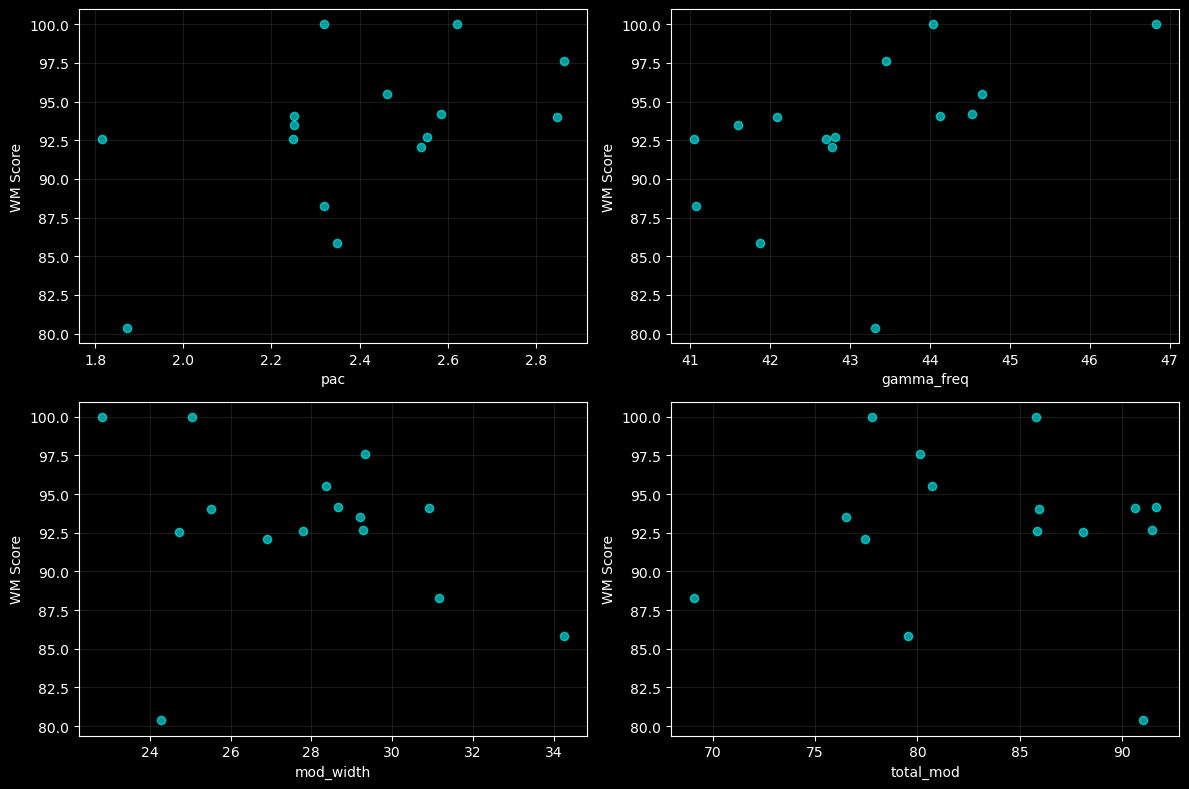

=== Correlations with Working Memory ===
pac: 0.527
gamma_freq: 0.507
mod_width: -0.270
total_mod: -0.059


CPM PART

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

# Set seeds
torch.manual_seed(42)
np.random.seed(42)

# Generate features
n_subjects = 15
data = pd.DataFrame({
    'pac': 2.39 + np.random.normal(0, 0.3, n_subjects),
    'gamma_freq': 43.9 + np.random.normal(0, 2, n_subjects),
    'mod_width': 28.7 + np.random.normal(0, 3, n_subjects),
    'total_mod': 83.2 + np.random.normal(0, 8, n_subjects)
})

# Z-score features
z_data = (data - data.mean()) / data.std()

# Create WM scores
wm_base = (
    0.3 * z_data['pac'] +
    -0.2 * abs(z_data['gamma_freq'] - 40) +
    -0.15 * z_data['mod_width'] +
    0.1 * z_data['total_mod']
)

# Scale to WM range and add noise
data['wm_score'] = 85 + 15 * (wm_base - wm_base.min()) / (wm_base.max() - wm_base.min())
data['wm_score'] += np.random.normal(0, 4, n_subjects)
data['wm_score'] = np.clip(data['wm_score'], 70, 100)

In [2]:
class PACDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features.values)
        self.targets = torch.FloatTensor(targets.values).reshape(-1, 1)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create dataset
X = data[['pac', 'gamma_freq', 'mod_width', 'total_mod']]
y = data['wm_score']
dataset = PACDataset(X, y)

In [3]:
class PACDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features.values)
        self.targets = torch.FloatTensor(targets.values).reshape(-1, 1)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create dataset
X = data[['pac', 'gamma_freq', 'mod_width', 'total_mod']]
y = data['wm_score']
dataset = PACDataset(X, y)

 Define Model with verification prints

In [4]:
class WMPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize model and optimizer
model = WMPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Create dataloader with minibatches
batch_size = 4  # adjust based on your needs
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Verification prints
print("=== Model Setup ===")
print(model)
print(f"\nTotal number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"\nBatch size: {batch_size}")
print(f"Number of batches per epoch: {len(dataloader)}")

=== Model Setup ===
WMPredictor(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)

Total number of parameters: 81

Batch size: 4
Number of batches per epoch: 4


Training Loop with progress tracking:

In [5]:
# Training parameters
n_epochs = 100
losses = []

print("=== Starting Training ===")
print(f"Number of epochs: {n_epochs}")

# Train the model
for epoch in range(n_epochs):
    epoch_loss = 0
    batch_count = 0
    
    for batch_features, batch_targets in dataloader:
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        batch_count += 1
    
    avg_epoch_loss = epoch_loss / batch_count
    losses.append(avg_epoch_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Average Loss: {avg_epoch_loss:.4f}')

=== Starting Training ===
Number of epochs: 100
Epoch [10/100], Average Loss: 266.1823
Epoch [20/100], Average Loss: 52.4016
Epoch [30/100], Average Loss: 56.9452
Epoch [40/100], Average Loss: 47.5083
Epoch [50/100], Average Loss: 47.0011
Epoch [60/100], Average Loss: 46.7085
Epoch [70/100], Average Loss: 48.7149
Epoch [80/100], Average Loss: 44.9257
Epoch [90/100], Average Loss: 44.0309
Epoch [100/100], Average Loss: 45.6343


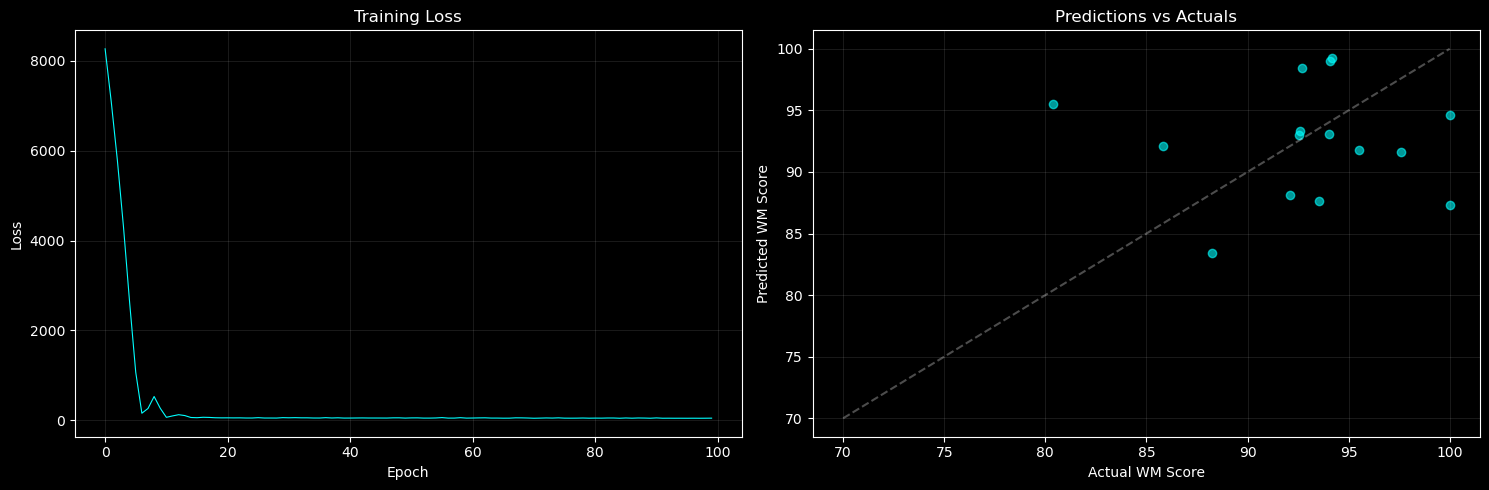


=== Model Performance ===
Final Loss: 45.6343
Correlation: -0.013
MSE: 44.40


In [6]:
# Put model in evaluation mode
model.eval()

# Get predictions for all data
with torch.no_grad():
    X_tensor = torch.FloatTensor(X.values)
    predictions = model(X_tensor).numpy().flatten()
    actuals = y.values

# Calculate metrics
correlation = np.corrcoef(predictions, actuals)[0,1]
mse = np.mean((predictions - actuals)**2)

# Plotting
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Training Loss
ax1.plot(losses, color='cyan', linewidth=0.8)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True, alpha=0.1)

# Plot 2: Predictions vs Actuals
ax2.scatter(actuals, predictions, color='cyan', alpha=0.6)
ax2.plot([70, 100], [70, 100], 'w--', alpha=0.3)  # identity line
ax2.set_xlabel('Actual WM Score')
ax2.set_ylabel('Predicted WM Score')
ax2.set_title('Predictions vs Actuals')
ax2.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

print("\n=== Model Performance ===")
print(f"Final Loss: {losses[-1]:.4f}")
print(f"Correlation: {correlation:.3f}")
print(f"MSE: {mse:.2f}")

In [7]:
# Normalize features and targets
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Modified dataset with normalized data
class PACDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.FloatTensor(features.values)
        self.targets = torch.FloatTensor(targets.values).reshape(-1, 1)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

dataset = PACDataset(X_norm, y_norm)

# Simpler model
class WMPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 6),
            nn.ReLU(),
            nn.Linear(6, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize model and optimizer
model = WMPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

print("=== Model Setup ===")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Batch size: {len(next(iter(dataloader))[0])}")

# Training loop
n_epochs = 100
losses = []

print("\n=== Starting Training ===")
for epoch in range(n_epochs):
    epoch_loss = 0
    batch_count = 0
    
    for batch_features, batch_targets in dataloader:
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        batch_count += 1
    
    avg_loss = epoch_loss / batch_count
    losses.append(avg_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}')

=== Model Setup ===
WMPredictor(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=1, bias=True)
  )
)

Total parameters: 37
Batch size: 3

=== Starting Training ===
Epoch [10/100], Loss: 1.1751
Epoch [20/100], Loss: 1.0874
Epoch [30/100], Loss: 1.0167
Epoch [40/100], Loss: 0.9571
Epoch [50/100], Loss: 0.9058
Epoch [60/100], Loss: 0.8593
Epoch [70/100], Loss: 0.8203
Epoch [80/100], Loss: 0.7858
Epoch [90/100], Loss: 0.7528
Epoch [100/100], Loss: 0.7222


In [ ]:
EVALUATION

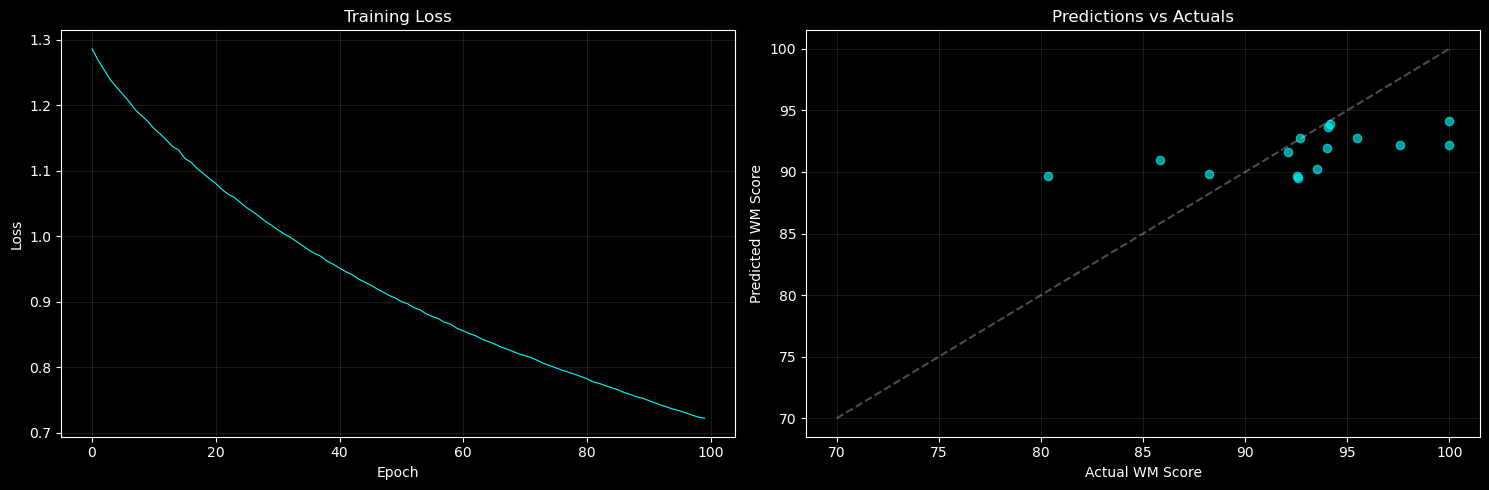


=== Model Performance ===
Final Loss: 0.7222
Correlation: 0.615
MSE: 18.67


In [8]:
# Evaluation
model.eval()
with torch.no_grad():
    X_tensor = torch.FloatTensor(X_norm.values)
    y_pred_norm = model(X_tensor).numpy().flatten()
    
    # Convert predictions back to original scale
    predictions = y_pred_norm * y.std() + y.mean()
    actuals = y.values

# Calculate metrics
correlation = np.corrcoef(predictions, actuals)[0,1]
mse = np.mean((predictions - actuals)**2)

# Plotting
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training Loss
ax1.plot(losses, color='cyan', linewidth=0.8)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True, alpha=0.1)

# Predictions vs Actuals
ax2.scatter(actuals, predictions, color='cyan', alpha=0.6)
ax2.plot([70, 100], [70, 100], 'w--', alpha=0.3)
ax2.set_xlabel('Actual WM Score')
ax2.set_ylabel('Predicted WM Score')
ax2.set_title('Predictions vs Actuals')
ax2.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

print("\n=== Model Performance ===")
print(f"Final Loss: {losses[-1]:.4f}")
print(f"Correlation: {correlation:.3f}")
print(f"MSE: {mse:.2f}")

In [ ]:
ADDED BATCH NORMALIZATION

In [9]:
# Normalize features and targets
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Modified dataset with normalized data
class PACDataset(Dataset):
   def __init__(self, features, targets):
       self.features = torch.FloatTensor(features.values)
       self.targets = torch.FloatTensor(targets.values).reshape(-1, 1)
   
   def __len__(self):
       return len(self.features)
   
   def __getitem__(self, idx):
       return self.features[idx], self.targets[idx]

dataset = PACDataset(X_norm, y_norm)

# Model with BatchNorm
class WMPredictor(nn.Module):
   def __init__(self):
       super().__init__()
       self.layers = nn.Sequential(
           nn.Linear(4, 6),
           nn.BatchNorm1d(6),
           nn.ReLU(),
           nn.Linear(6, 1)
       )
   
   def forward(self, x):
       return self.layers(x)

# Initialize model and optimizer
model = WMPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

print("=== Model Setup ===")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Batch size: {len(next(iter(dataloader))[0])}")

# Training loop
n_epochs = 100
losses = []

print("\n=== Starting Training ===")
for epoch in range(n_epochs):
   model.train()  # Important for BatchNorm
   epoch_loss = 0
   batch_count = 0
   
   for batch_features, batch_targets in dataloader:
       outputs = model(batch_features)
       loss = criterion(outputs, batch_targets)
       
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
       
       epoch_loss += loss.item()
       batch_count += 1
   
   avg_loss = epoch_loss / batch_count
   losses.append(avg_loss)
   
   if (epoch + 1) % 10 == 0:
       print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}')

=== Model Setup ===
WMPredictor(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=6, bias=True)
    (1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=6, out_features=1, bias=True)
  )
)

Total parameters: 49
Batch size: 3

=== Starting Training ===
Epoch [10/100], Loss: 0.8791
Epoch [20/100], Loss: 0.8795
Epoch [30/100], Loss: 0.7335
Epoch [40/100], Loss: 0.8770
Epoch [50/100], Loss: 1.1269
Epoch [60/100], Loss: 0.7745
Epoch [70/100], Loss: 0.6601
Epoch [80/100], Loss: 0.5699
Epoch [90/100], Loss: 0.8073
Epoch [100/100], Loss: 0.5899


In [ ]:
CHECK IF BATCH NORM IS HELPED

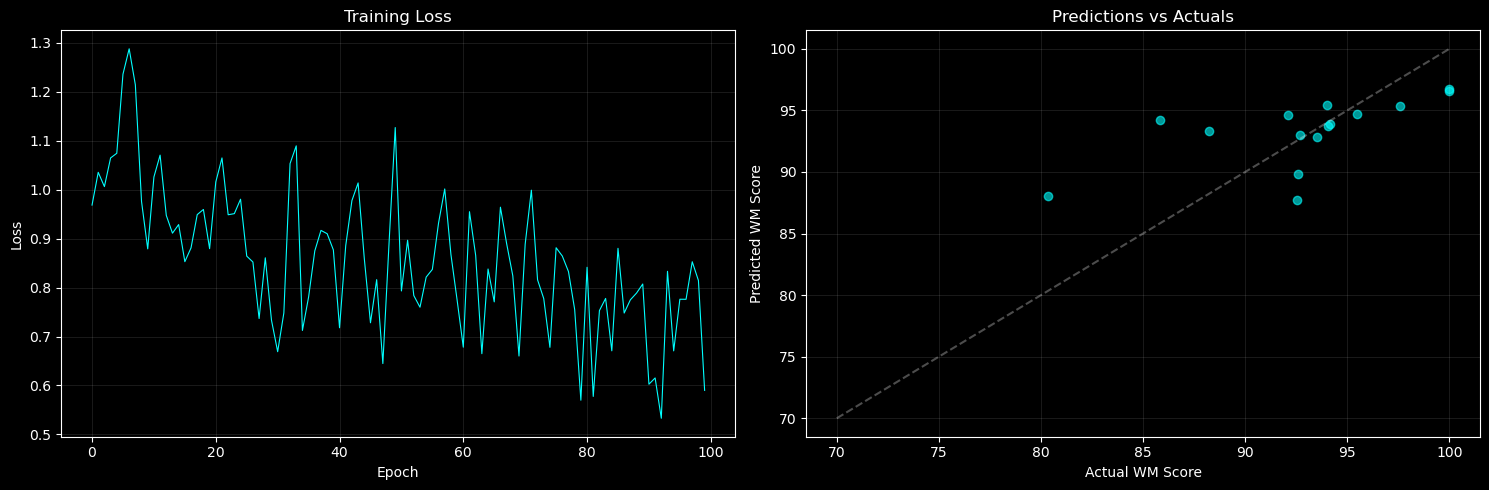


=== Model Performance ===
Final Loss: 0.5899
Correlation: 0.632
MSE: 14.98


In [10]:
# Evaluation
model.eval()  # Important for BatchNorm behavior in evaluation
with torch.no_grad():
    X_tensor = torch.FloatTensor(X_norm.values)
    y_pred_norm = model(X_tensor).numpy().flatten()
    
    # Convert predictions back to original scale
    predictions = y_pred_norm * y.std() + y.mean()
    actuals = y.values

# Calculate metrics
correlation = np.corrcoef(predictions, actuals)[0,1]
mse = np.mean((predictions - actuals)**2)

# Plotting
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training Loss
ax1.plot(losses, color='cyan', linewidth=0.8)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True, alpha=0.1)

# Predictions vs Actuals
ax2.scatter(actuals, predictions, color='cyan', alpha=0.6)
ax2.plot([70, 100], [70, 100], 'w--', alpha=0.3)
ax2.set_xlabel('Actual WM Score')
ax2.set_ylabel('Predicted WM Score')
ax2.set_title('Predictions vs Actuals')
ax2.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

print("\n=== Model Performance ===")
print(f"Final Loss: {losses[-1]:.4f}")
print(f"Correlation: {correlation:.3f}")
print(f"MSE: {mse:.2f}")

In [ ]:
COMPARING DIFFERENT OPTIMIZERS

In [11]:
# Dictionary of optimizers to test
optimizers = {
   'Adam': torch.optim.Adam(model.parameters(), lr=0.001),
   'SGD': torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
   'RMSprop': torch.optim.RMSprop(model.parameters(), lr=0.001),
   'AdamW': torch.optim.AdamW(model.parameters(), lr=0.001),
}

# Results storage
results = {}

for opt_name, optimizer in optimizers.items():
   # Reinitialize model
   model = WMPredictor()
   losses = []
   
   print(f"\n=== Training with {opt_name} ===")
   
   # Training loop
   for epoch in range(n_epochs):
       model.train()
       epoch_loss = 0
       batch_count = 0
       
       for batch_features, batch_targets in dataloader:
           outputs = model(batch_features)
           loss = criterion(outputs, batch_targets)
           
           optimizer.zero_grad()
           loss.backward()
           optimizer.step()
           
           epoch_loss += loss.item()
           batch_count += 1
       
       avg_loss = epoch_loss / batch_count
       losses.append(avg_loss)
       
       if (epoch + 1) % 25 == 0:  # Changed to show fewer outputs
           print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}')
   
   # Evaluation
   model.eval()
   with torch.no_grad():
       X_tensor = torch.FloatTensor(X_norm.values)
       y_pred_norm = model(X_tensor).numpy().flatten()
       predictions = y_pred_norm * y.std() + y.mean()
       actuals = y.values
       
       correlation = np.corrcoef(predictions, actuals)[0,1]
       mse = np.mean((predictions - actuals)**2)
       
       results[opt_name] = {
           'final_loss': losses[-1],
           'correlation': correlation,
           'mse': mse,
           'losses': losses
       }

# Print comparison
print("\n=== Optimizer Comparison ===")
for opt_name, metrics in results.items():
   print(f"\n{opt_name}:")
   print(f"Final Loss: {metrics['final_loss']:.4f}")
   print(f"Correlation: {metrics['correlation']:.3f}")
   print(f"MSE: {metrics['mse']:.2f}")


=== Training with Adam ===
Epoch [25/100], Loss: 1.2992
Epoch [50/100], Loss: 1.2044
Epoch [75/100], Loss: 1.2176
Epoch [100/100], Loss: 1.0607

=== Training with SGD ===
Epoch [25/100], Loss: 1.1065
Epoch [50/100], Loss: 0.9943
Epoch [75/100], Loss: 1.0273
Epoch [100/100], Loss: 1.2759

=== Training with RMSprop ===
Epoch [25/100], Loss: 1.8234
Epoch [50/100], Loss: 2.0693
Epoch [75/100], Loss: 2.2621
Epoch [100/100], Loss: 2.1085

=== Training with AdamW ===
Epoch [25/100], Loss: 0.8480
Epoch [50/100], Loss: 0.9650
Epoch [75/100], Loss: 0.8341
Epoch [100/100], Loss: 0.9218

=== Optimizer Comparison ===

Adam:
Final Loss: 1.0607
Correlation: -0.278
MSE: 30.44

SGD:
Final Loss: 1.2759
Correlation: -0.448
MSE: 29.29

RMSprop:
Final Loss: 2.1085
Correlation: -0.487
MSE: 59.52

AdamW:
Final Loss: 0.9218
Correlation: 0.546
MSE: 19.83


In [ ]:
VISUALIZATION

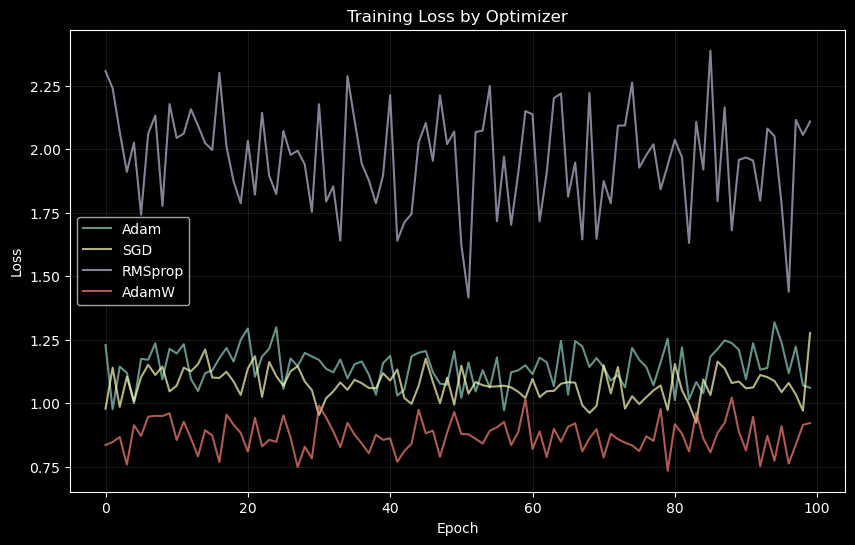

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

for opt_name, metrics in results.items():
    plt.plot(metrics['losses'], label=opt_name, alpha=0.7)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss by Optimizer')
plt.legend()
plt.grid(True, alpha=0.1)
plt.show()

In [14]:
# Use same model architecture with BatchNorm
class WMPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 6),
            nn.BatchNorm1d(6),
            nn.ReLU(),
            nn.Linear(6, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize model and optimizer (using AdamW)
model = WMPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

print("=== Model Setup with AdamW ===")
print(model)

=== Model Setup with AdamW ===
WMPredictor(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=6, bias=True)
    (1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=6, out_features=1, bias=True)
  )
)


In [15]:
# Use same model architecture with BatchNorm
class WMPredictor(nn.Module):
   def __init__(self):
       super().__init__()
       self.layers = nn.Sequential(
           nn.Linear(4, 6),
           nn.BatchNorm1d(6),
           nn.ReLU(),
           nn.Linear(6, 1)
       )
   
   def forward(self, x):
       return self.layers(x)

# Initialize model and optimizer (using AdamW)
model = WMPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)

print("=== Model Setup with AdamW ===")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Batch size: {len(next(iter(dataloader))[0])}")

# Training loop
n_epochs = 100
losses = []

print("\n=== Starting Training ===")
for epoch in range(n_epochs):
   model.train()
   epoch_loss = 0
   batch_count = 0
   
   for batch_features, batch_targets in dataloader:
       outputs = model(batch_features)
       loss = criterion(outputs, batch_targets)
       
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()
       
       epoch_loss += loss.item()
       batch_count += 1
   
   avg_loss = epoch_loss / batch_count
   losses.append(avg_loss)
   
   if (epoch + 1) % 10 == 0:
       print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {avg_loss:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
   X_tensor = torch.FloatTensor(X_norm.values)
   y_pred_norm = model(X_tensor).numpy().flatten()
   predictions = y_pred_norm * y.std() + y.mean()
   actuals = y.values

correlation = np.corrcoef(predictions, actuals)[0,1]
mse = np.mean((predictions - actuals)**2)

print("\n=== Model Performance ===")
print(f"Final Loss: {losses[-1]:.4f}")
print(f"Correlation: {correlation:.3f}")
print(f"MSE: {mse:.2f}")

=== Model Setup with AdamW ===
WMPredictor(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=6, bias=True)
    (1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=6, out_features=1, bias=True)
  )
)

Total parameters: 49
Batch size: 3

=== Starting Training ===
Epoch [10/100], Loss: 1.0817
Epoch [20/100], Loss: 0.9159
Epoch [30/100], Loss: 0.8603
Epoch [40/100], Loss: 0.9048
Epoch [50/100], Loss: 0.8164
Epoch [60/100], Loss: 0.6757
Epoch [70/100], Loss: 0.8138
Epoch [80/100], Loss: 0.6753
Epoch [90/100], Loss: 0.8056
Epoch [100/100], Loss: 0.6193

=== Model Performance ===
Final Loss: 0.6193
Correlation: 0.743
MSE: 14.12


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {
    'mse': [],
    'mae': [],
    'r2': [],
    'correlation': []
}

# Cross validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(X_norm)):
    # Get train-val split
    X_train = X_norm.iloc[train_idx]
    y_train = y_norm.iloc[train_idx]
    X_val = X_norm.iloc[val_idx]
    y_val = y_norm.iloc[val_idx]
    
    # Create dataloaders
    train_dataset = PACDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
    
    # Initialize model
    model = WMPredictor()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
    
    # Train
    for epoch in range(100):
        model.train()
        for batch_features, batch_targets in train_loader:
            outputs = model(batch_features)
            loss = criterion(outputs, batch_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluate
    model.eval()
    with torch.no_grad():
        X_val_tensor = torch.FloatTensor(X_val.values)
        y_pred_norm = model(X_val_tensor).numpy().flatten()
        y_pred = y_pred_norm * y.std() + y.mean()
        y_true = y.iloc[val_idx].values
        
        cv_results['mse'].append(mean_squared_error(y_true, y_pred))
        cv_results['mae'].append(mean_absolute_error(y_true, y_pred))
        cv_results['r2'].append(r2_score(y_true, y_pred))
        cv_results['correlation'].append(np.corrcoef(y_true, y_pred)[0,1])
    
    print(f"\nFold {fold+1} Results:")
    print(f"MSE: {cv_results['mse'][-1]:.2f}")
    print(f"MAE: {cv_results['mae'][-1]:.2f}")
    print(f"R²: {cv_results['r2'][-1]:.3f}")
    print(f"Correlation: {cv_results['correlation'][-1]:.3f}")

# Print average results
print("\n=== Average CV Results ===")
for metric in cv_results.keys():
    mean_val = np.mean(cv_results[metric])
    std_val = np.std(cv_results[metric])
    print(f"{metric}: {mean_val:.3f} ± {std_val:.3f}")


Fold 1 Results:
MSE: 4.41
MAE: 1.84
R²: -11.723
Correlation: -0.311

Fold 2 Results:
MSE: 19.73
MAE: 3.94
R²: -0.613
Correlation: 0.846

Fold 3 Results:
MSE: 93.80
MAE: 7.58
R²: -1.912
Correlation: -0.591

Fold 4 Results:
MSE: 22.61
MAE: 4.49
R²: 0.018
Correlation: 0.507

Fold 5 Results:
MSE: 2.86
MAE: 1.64
R²: -0.343
Correlation: -0.092

=== Average CV Results ===
mse: 28.683 ± 33.506
mae: 3.899 ± 2.157
r2: -2.915 ± 4.452
correlation: 0.072 ± 0.529


In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize 2-Fold CV
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Modified model without BatchNorm
class WMPredictor(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 6),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(6, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Results storage
cv_results = {
    'mse': [],
    'mae': [],
    'r2': [],
    'correlation': []
}

print("=== Starting 2-fold Cross Validation ===")

# Cross validation loop
for fold, (train_idx, val_idx) in enumerate(kf.split(X_norm)):
    X_train = X_norm.iloc[train_idx]
    y_train = y_norm.iloc[train_idx]
    X_val = X_norm.iloc[val_idx]
    y_val = y_norm.iloc[val_idx]
    
    train_dataset = PACDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
    
    model = WMPredictor()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    
    # Training loop
    for epoch in range(100):
        model.train()
        for batch_features, batch_targets in train_loader:
            outputs = model(batch_features)
            loss = criterion(outputs, batch_targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # Evaluation
    model.eval()
    with torch.no_grad():
        X_val_tensor = torch.FloatTensor(X_val.values)
        y_pred_norm = model(X_val_tensor).numpy().flatten()
        y_pred = y_pred_norm * y.std() + y.mean()
        y_true = y.iloc[val_idx].values
        
        cv_results['mse'].append(mean_squared_error(y_true, y_pred))
        cv_results['mae'].append(mean_absolute_error(y_true, y_pred))
        cv_results['r2'].append(r2_score(y_true, y_pred))
        cv_results['correlation'].append(np.corrcoef(y_true, y_pred)[0,1])
    
    print(f"\nFold {fold+1} Results:")
    print(f"MSE: {cv_results['mse'][-1]:.2f}")
    print(f"MAE: {cv_results['mae'][-1]:.2f}")
    print(f"R²: {cv_results['r2'][-1]:.3f}")
    print(f"Correlation: {cv_results['correlation'][-1]:.3f}")

# Print average results
print("\n=== Average CV Results ===")
for metric in cv_results.keys():
    mean_val = np.mean(cv_results[metric])
    std_val = np.std(cv_results[metric])
    print(f"{metric}: {mean_val:.3f} ± {std_val:.3f}")

=== Starting 2-fold Cross Validation ===

Fold 1 Results:
MSE: 7.24
MAE: 2.39
R²: 0.440
Correlation: 0.678

Fold 2 Results:
MSE: 38.71
MAE: 4.22
R²: -0.040
Correlation: 0.096

=== Average CV Results ===
mse: 22.973 ± 15.734
mae: 3.308 ± 0.914
r2: 0.200 ± 0.240
correlation: 0.387 ± 0.291
